In [ ]:
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [23]:
# df1 = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/Labels_excel_json_output_v2.csv')
# df2 = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/cuff_closure_david_label_seg_v2.csv')
# # mount_point = '/MEDUSA_STOR/jprieto/surgery_tracking/'
# df_cat = pd.concat([df1, df2])
# df_cat.to_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/all_datasets_segs_v2.csv')
df = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/csv_per_vid/!Hyst_MedT_3.21.23d_excel_json_output.csv')
# df = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/csv_per_vid/Hyst_BB_4.17.23_excel_json_output.csv')
# df = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes.csv')

In [24]:
df[['Instrument Name']].value_counts()

Instrument Name           
Laparoscopic Grasper          6752
Laparoscopic Needle Driver    6391
Needle                        6370
Laparoscopic Scissors          187
dtype: int64

In [35]:
train_list = ['SurgU_3.21.23d_3069_3157.mp4','DPM_12.14.22e_3462_4190.mp4','BB_4.17.23_3936_4064.mp4', 'BB_4.14.23_4219_5319.mp4', 'SurgU_3.21.23a_4005_4425.mp4','JS_1.30.23_2931_3502.mp4']
test_list = ['BB_1.20.23a_3525_3753.mp4','MedT_3.20.23w_1604_1612.mp4', 'LHC_4.4.2023c_4952_5932.mp4', 'SurgU_3.21.23b_785_1181.mp4']
val_list = ['MedT_3.20.23r_2965_3187.mp4', 'BB_1.20.23b_4110_5115.mp4']

In [ ]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
df_test = pd.DataFrame()

for video_name in df['Video Name'].unique():
  name = video_name.split('Hyst_')[1]
  df_vid = df.loc[df['Video Name']==video_name]
  if name in train_list:
    df_train = pd.concat([df_train, df_vid])
  elif name in val_list:
    df_val = pd.concat([df_val, df_vid])

  elif name in test_list:
    df_test = pd.concat([df_test, df_vid])

  else:
    print(name)


In [42]:
print(df_train['class'].value_counts())
print(df_val['class'].value_counts())
print(df_test['class'].value_counts())

5    25717
4    23314
6    21491
1     9307
2     3789
3     2594
Name: class, dtype: int64
3    8463
4    2870
1    1372
5    1040
6     553
2     106
Name: class, dtype: int64
4    6258
1    5865
5    5715
6    3640
2     856
3     558
Name: class, dtype: int64


In [41]:
df_train.to_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_train_train.csv')
df_val.to_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_train_test.csv')
df_test.to_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_test.csv')

In [33]:
for video_name in df['Video Name'].unique():
  df_vid = df.loc[df['Video Name']==video_name]

  name = video_name.split('Hyst_')[1]
  class_columns = df_vid['class'].unique()

  print(len(class_columns),class_columns, len(df_vid), name)

4 [4 3 2 1] 11519 MedT_3.20.23r_2965_3187.mp4
3 [4 3 2] 6563 SurgU_3.21.23d_3069_3157.mp4
5 [4 5 6 1 2] 20750 BB_1.20.23a_3525_3753.mp4
3 [3 2 4] 472 MedT_3.20.23w_1604_1612.mp4
4 [5 6 4 1] 65662 DPM_12.14.22e_3462_4190.mp4
3 [4 5 1] 11465 BB_4.17.23_3936_4064.mp4
3 [5 1 6] 2885 BB_1.20.23b_4110_5115.mp4
4 [1 6 5 2] 1027 BB_4.14.23_4219_5319.mp4
3 [2 3 1] 227 JS_1.30.23_2931_3502.mp4
3 [6 5 1] 1005 LHC_4.4.2023c_4952_5932.mp4
2 [3 2] 1268 SurgU_3.21.23a_4005_4425.mp4
3 [2 3 1] 665 SurgU_3.21.23b_785_1181.mp4


In [34]:
for video_name in df['Video Name'].unique():
  df_vid = df.loc[df['Video Name']==video_name]

  name = video_name.split('Hyst_')[1]
  class_columns = df_vid['class_column'].unique()

  print(len(class_columns),class_columns, len(df_vid), name)

4 [4 3 2 9] 11519 MedT_3.20.23r_2965_3187.mp4
3 [4 3 2] 6563 SurgU_3.21.23d_3069_3157.mp4
5 [4 5 6 1 2] 20750 BB_1.20.23a_3525_3753.mp4
3 [3 2 4] 472 MedT_3.20.23w_1604_1612.mp4
4 [5 6 4 7] 65662 DPM_12.14.22e_3462_4190.mp4
3 [4 5 1] 11465 BB_4.17.23_3936_4064.mp4
4 [ 5  8  6 10] 2885 BB_1.20.23b_4110_5115.mp4
5 [ 8  6  5  2 10] 1027 BB_4.14.23_4219_5319.mp4
3 [ 2  3 10] 227 JS_1.30.23_2931_3502.mp4
3 [6 5 8] 1005 LHC_4.4.2023c_4952_5932.mp4
2 [3 2] 1268 SurgU_3.21.23a_4005_4425.mp4
3 [ 2  3 10] 665 SurgU_3.21.23b_785_1181.mp4


In [19]:
df['class'] = df['class_column']

In [27]:
concat_labels = ["Bipolar", "Vessel Sealer", "Laparoscopic Scissors", "Laparoscopic Suction", "Robot Grasper Heat"]


if concat_labels is not None:
    replacement_val = df.loc[ df['Instrument Name'] == concat_labels[0]]['class'].unique()
    df.loc[ df['Instrument Name'].isin(concat_labels), "class" ] = replacement_val[0]

unique_classes = sorted(df["class"].unique())
class_mapping = {value: idx+1 for idx, value in enumerate(unique_classes)}

df["class"] = df["class"].map(class_mapping)
# print(f"Kept Classes : {df['Instrument Name'].unique()}, {class_mapping}")
print(df[['Instrument Name', 'class']].value_counts())

Instrument Name             class
Robot Needle Driver         5        32472
Needle                      4        32442
Robot Grasper               6        25684
Laparoscopic Needle Driver  3        11615
Bipolar                     1         9300
Vessel Sealer               1         5066
Laparoscopic Grasper        2         4751
Robot Grasper Heat          1         1992
Laparoscopic Suction        1          106
Laparoscopic Scissors       1           80
dtype: int64


In [30]:
df[ ['Dataset Title', 'Video Name', 'Frame', 'Instrument Name', 'x', 'y', 'w', 'h', 'img_path', 'class_column', 'seg_path', 'class']].to_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes.csv')

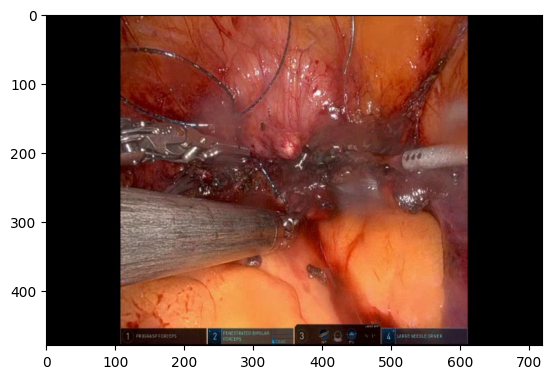

In [11]:
seg = sitk.ReadImage('/MEDUSA_STOR/jprieto/surgery_tracking/img/Hyst_BB_1.20.23b_4110_5115_frame_19921.nrrd')
plt.imshow(sitk.GetArrayFromImage(seg))

In [31]:
df_train = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_train_train.csv')
df_val = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_train_test.csv')
df_test = pd.read_csv('/MEDUSA_STOR/jprieto/surgery_tracking/csv/dataset_6_classes_test.csv')

In [32]:
print(df_train['class'].value_counts())
print(df_val['class'].value_counts())
print(df_test['class'].value_counts())

4    11743
1    11398
5    10929
6     4460
2     4071
3     2458
Name: class, dtype: int64
3    694
2    574
Name: class, dtype: int64
5    21543
6    21224
4    20699
3     8463
1     5146
2      106
Name: class, dtype: int64
